In [76]:
%matplotlib inline

os.environ['MKL_SERVICE_FORCE_INTEL'] = '1'
os.environ['MUJOCO_GL'] = 'egl'

import pickle
import dmc
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt
import imageio
from IPython.display import HTML

In [77]:
# choose the name of the task
task = 'quadruped_stand'
root = Path('agent_runs')


with open(root / f'{task}.pickle', 'rb') as f:
    data = pickle.load(f)

(array([ 1.,  1.,  1.,  3.,  7., 18., 22., 17., 13., 17.]),
 array([830.55348154, 846.98573055, 863.41797957, 879.85022858,
        896.28247759, 912.71472661, 929.14697562, 945.57922464,
        962.01147365, 978.44372266, 994.87597168]),
 <BarContainer object of 10 artists>)

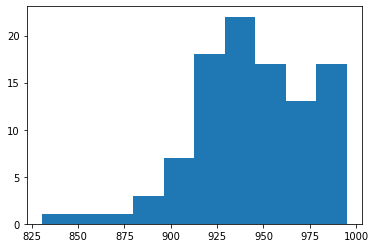

In [78]:
# plot reward distribution among all existing samples
returns = data['reward'].sum((-1, -2))
plt.hist(returns)


In [79]:
# check the videos of some of the stored observations

max_ret, min_ret = returns.max(), returns.min()
N = len(returns)
rank_list = (N * np.array([0.1, 0.5, 0.9])).astype('int') 

inds = returns.argsort()
for rank in rank_list:
    ind = inds[rank]
    print(f'return = {returns[ind]}')
    obs = data['obs'][ind]
    # display
    imageio.mimsave(f'{task}_{rank}.gif', obs.transpose(0, 2, 3, 1), fps=20)


return = 906.2789119064053
return = 942.7867605164224
return = 990.082911794337


In [80]:
HTML(f'<img src="{task}_90.gif">')


In [81]:
HTML(f'<img src="{task}_50.gif">')

In [82]:
HTML(f'<img src="{task}_10.gif">')